# Neural Networks - To predict Whether Patients has diabetics or not .


# 1. Load Data

The first step is to define the functions and classes we intend to use in this project.

We will use the NumPy library to load our dataset and 
we will use two classes from the Keras library to define our model.



In [32]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
## Import Keras objects for Deep Learning
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [34]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
data = pd.read_csv('data/indians-diabetes.csv', names=names, header=0)


In [35]:
print(data.shape)

(768, 9)


In [36]:
#Print no of integers, floats and strings
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [37]:
#Data should be numerical 
data.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#Print no of entries for each color
data.has_diabetes.value_counts()

0    500
1    268
Name: has_diabetes, dtype: int64

In [39]:
#Print % of each colors
data.has_diabetes.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: has_diabetes, dtype: float64

# 2. Preprocessing Steps

#### 1. Select Features and Split to X and y .

In [40]:
X = data.iloc[:, :-1].values
y = data["has_diabetes"].values

#### 2. Split data to train and test .

In [41]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2132)

#### 3. Normalize Data

In [42]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 3 .Building a single hidden layer Neural network.(2-layer neural network)

## 1. Define Keras Model

There are two top numerical platforms for developing deep learning models, they are Theano developed by the University of Montreal and TensorFlow developed at Google. Both were developed for use in Python and both can be leveraged by the super simple to use Keras library. Keras wraps the numerical computing complexity of Theano and TensorFlow providing a concise API that we will use to develop our own neural network and deep learning models.

Models in Keras are defined as a sequence of layers.
We create a Sequential model and add layers one at a time to our network architecture.

We have input varaibles 8 and we have to set the input to 8.
In this Project, we will build a fully-connected network structure with one hidden layer.
Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.
We will use the Sigmoid activation function in layers

The model expects rows of data with 8 variables (the input_shape=8 argument).
The one hidden layer has 12 nodes and uses the Sigmoid activation function.
The output layer has one node and uses the sigmoid activation function

We use a sigmoid activation function on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

In [43]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

## 2. Summary of Keras model and count how many parameters 

In [44]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 3.Compile Kears Model

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) 
such as Theano or TensorFlow. The backend automatically chooses the best way to represent
the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. 
Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights,
the optimizer is used to search through different weights for the network and any optional metrics
we would like to collect and report during training.

In our project, we will use cross entropy as the loss argument. 
This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

We will define the optimizer as the efficient stochastic gradient descent algorithm “SGD“.

Finally, because it is a classification problem, we will collect and report the classification accuracy, 
defined via the metrics argument.

In [45]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])


## 4. Fit Model
We have defined our model and compiled it ready for efficient computation. Now it is time to execute the model on some data. We can train or fit our model on our loaded data by calling the fit() function on the model.
The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We can also set the number of instances that are evaluated before a weight update in the network is performed called the batch size and set using the batch size argument. For this problem we will run for a small number of epochs 200 . Again, these can be chosen experimentally by trial and error.This is where the work happens on your CPU or GPU.


In [46]:
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 1s 2ms/sample - loss: 0.6198 - accuracy: 0.6545 - val_loss: 0.6332 - val_accuracy: 0.6406
Epoch 2/200
576/576 [==============================] - 0s 223us/sample - loss: 0.6175 - accuracy: 0.6545 - val_loss: 0.6307 - val_accuracy: 0.6406
Epoch 3/200
576/576 [==============================] - 0s 301us/sample - loss: 0.6153 - accuracy: 0.6545 - val_loss: 0.6284 - val_accuracy: 0.6406
Epoch 4/200
576/576 [==============================] - 0s 269us/sample - loss: 0.6132 - accuracy: 0.6545 - val_loss: 0.6262 - val_accuracy: 0.6406
Epoch 5/200
576/576 [==============================] - 0s 277us/sample - loss: 0.6112 - accuracy: 0.6545 - val_loss: 0.6242 - val_accuracy: 0.6406
Epoch 6/200
576/576 [==============================] - 0s 258us/sample - loss: 0.6094 - accuracy: 0.6545 - val_loss: 0.6222 - val_accuracy: 0.6406
Epoch 7/200
576/576 [==============================] - 0s 259us/sample - l

576/576 [==============================] - 0s 222us/sample - loss: 0.5651 - accuracy: 0.6823 - val_loss: 0.5775 - val_accuracy: 0.6823
Epoch 57/200
576/576 [==============================] - 0s 202us/sample - loss: 0.5645 - accuracy: 0.6858 - val_loss: 0.5770 - val_accuracy: 0.6823
Epoch 58/200
576/576 [==============================] - 0s 189us/sample - loss: 0.5640 - accuracy: 0.6858 - val_loss: 0.5764 - val_accuracy: 0.6771
Epoch 59/200
576/576 [==============================] - 0s 190us/sample - loss: 0.5634 - accuracy: 0.6858 - val_loss: 0.5759 - val_accuracy: 0.6771
Epoch 60/200
576/576 [==============================] - 0s 189us/sample - loss: 0.5628 - accuracy: 0.6875 - val_loss: 0.5754 - val_accuracy: 0.6771
Epoch 61/200
576/576 [==============================] - 0s 188us/sample - loss: 0.5623 - accuracy: 0.6875 - val_loss: 0.5749 - val_accuracy: 0.6823
Epoch 62/200
576/576 [==============================] - 0s 188us/sample - loss: 0.5617 - accuracy: 0.6892 - val_loss: 0.5744 

576/576 [==============================] - 0s 187us/sample - loss: 0.5377 - accuracy: 0.7344 - val_loss: 0.5534 - val_accuracy: 0.7240
Epoch 112/200
576/576 [==============================] - 0s 185us/sample - loss: 0.5372 - accuracy: 0.7344 - val_loss: 0.5531 - val_accuracy: 0.7240
Epoch 113/200
576/576 [==============================] - 0s 187us/sample - loss: 0.5368 - accuracy: 0.7344 - val_loss: 0.5527 - val_accuracy: 0.7240
Epoch 114/200
576/576 [==============================] - 0s 180us/sample - loss: 0.5364 - accuracy: 0.7361 - val_loss: 0.5524 - val_accuracy: 0.7240
Epoch 115/200
576/576 [==============================] - 0s 196us/sample - loss: 0.5360 - accuracy: 0.7378 - val_loss: 0.5520 - val_accuracy: 0.7240
Epoch 116/200
576/576 [==============================] - 0s 189us/sample - loss: 0.5356 - accuracy: 0.7378 - val_loss: 0.5517 - val_accuracy: 0.7240
Epoch 117/200
576/576 [==============================] - 0s 193us/sample - loss: 0.5351 - accuracy: 0.7378 - val_loss: 0

576/576 [==============================] - 0s 191us/sample - loss: 0.5171 - accuracy: 0.7569 - val_loss: 0.5369 - val_accuracy: 0.7500
Epoch 167/200
576/576 [==============================] - 0s 178us/sample - loss: 0.5168 - accuracy: 0.7569 - val_loss: 0.5367 - val_accuracy: 0.7500
Epoch 168/200
576/576 [==============================] - 0s 187us/sample - loss: 0.5165 - accuracy: 0.7587 - val_loss: 0.5364 - val_accuracy: 0.7500
Epoch 169/200
576/576 [==============================] - 0s 186us/sample - loss: 0.5161 - accuracy: 0.7587 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 170/200
576/576 [==============================] - 0s 196us/sample - loss: 0.5158 - accuracy: 0.7587 - val_loss: 0.5359 - val_accuracy: 0.7500
Epoch 171/200
576/576 [==============================] - 0s 191us/sample - loss: 0.5155 - accuracy: 0.7587 - val_loss: 0.5357 - val_accuracy: 0.7500
Epoch 172/200
576/576 [==============================] - 0s 241us/sample - loss: 0.5152 - accuracy: 0.7604 - val_loss: 0

## 5. Evaluate Model and Make Predictions 
we have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for the training and evaluation of your model.
You can evaluate your model on your training dataset using the evaluation() function on your model and pass it the same input and output used to train the model. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

Running this example, you should see a message for each of the 200 epochs printing the loss and accuracy for each, followed by the final evaluation of the trained model on the training dataset. It takes about 10 seconds to execute on my workstation running on the CPU with a Theano backend.

We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset we have not seen before. Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them. For example:

Alternately, we can call the predict classes() function on the model to predict crisp classes directly, for example:


In [47]:
## Here we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [48]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [49]:
y_pred_prob_nn_1[:10]

array([[0.12844774],
       [0.5521791 ],
       [0.56120837],
       [0.32033604],
       [0.28364098],
       [0.15944955],
       [0.3500982 ],
       [0.3107115 ],
       [0.25984943],
       [0.15833747]], dtype=float32)

In [50]:
# summarize the first 5 cases
for i in range(5):
  print('%s => %d (expected %d)' % (X_test_norm[i].tolist(), y_pred_class_nn_1[i], y_test[i]))

[-0.5416279490820181, -0.9825920587543939, -0.4431052179643574, -1.2626454310072173, -0.7044911778928117, -1.0511329092320356, -0.853253560391699, -0.6944384640646587] => 0 (expected 0)
[1.5642967285444977, 1.0322190244540816, 0.4700561614541394, 0.585441393302855, 0.15936312122214458, -0.12408105376003534, -0.9333498909417083, 1.0204449455869737] => 1 (expected 0)
[2.7676822586167926, 0.15073917555037364, 1.078830414399804, -1.2626454310072173, -0.7044911778928117, 1.4418849183210465, 0.3096264979639927, 0.7632124341392289] => 1 (expected 1)
[0.36091119847220293, -0.7622220965284668, 0.36859378596319536, 0.40063271087184776, -0.7044911778928117, 0.46472215174245185, -0.2985123080638562, 1.620654138965045] => 0 (expected 1)
[0.9626039635083503, -0.22703790255121553, 0.36859378596319536, -0.21539623056484294, 0.2457485511336402, -1.0135497259020896, -0.037457601086047766, -0.1799734411691689] => 0 (expected 0)


In [51]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))



accuracy is 0.750
roc-auc is 0.808


Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run. This is a feature, not a bug. The variance in the performance of the model means that to get a reasonable approximation of how well your model is performing, you may need to fit it many times and calculate the average of the accuracy scores. For example, we can get different accuracy  accuracy scores from re-running the example 5 times:

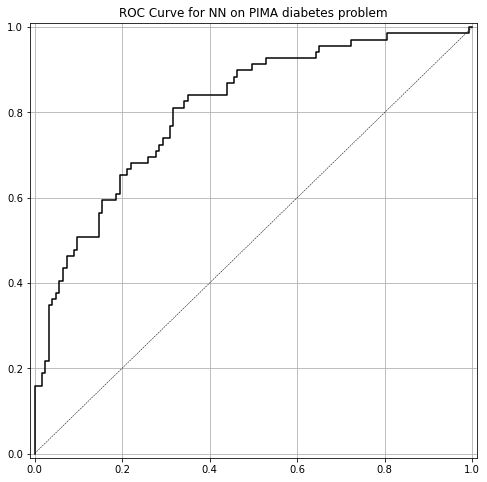

In [52]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [53]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

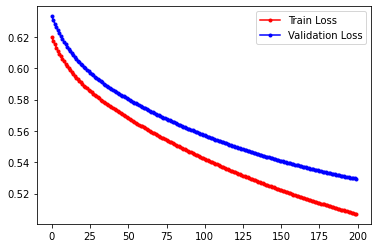

In [54]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [55]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 477us/sample - loss: 0.5067 - accuracy: 0.7691 - val_loss: 0.5293 - val_accuracy: 0.7500
Epoch 2/1000
576/576 [==============================] - 0s 296us/sample - loss: 0.5064 - accuracy: 0.7691 - val_loss: 0.5291 - val_accuracy: 0.7500
Epoch 3/1000
576/576 [==============================] - 0s 278us/sample - loss: 0.5062 - accuracy: 0.7691 - val_loss: 0.5289 - val_accuracy: 0.7500
Epoch 4/1000
576/576 [==============================] - 0s 251us/sample - loss: 0.5059 - accuracy: 0.7691 - val_loss: 0.5287 - val_accuracy: 0.7500
Epoch 5/1000
576/576 [==============================] - 0s 259us/sample - loss: 0.5057 - accuracy: 0.7691 - val_loss: 0.5285 - val_accuracy: 0.7500
Epoch 6/1000
576/576 [==============================] - 0s 263us/sample - loss: 0.5054 - accuracy: 0.7674 - val_loss: 0.5283 - val_accuracy: 0.7500
Epoch 7/1000
576/576 [==============================] - 0s 260us/s

Epoch 56/1000
576/576 [==============================] - 0s 197us/sample - loss: 0.4937 - accuracy: 0.7760 - val_loss: 0.5206 - val_accuracy: 0.7500
Epoch 57/1000
576/576 [==============================] - 0s 190us/sample - loss: 0.4935 - accuracy: 0.7760 - val_loss: 0.5205 - val_accuracy: 0.7500
Epoch 58/1000
576/576 [==============================] - 0s 186us/sample - loss: 0.4933 - accuracy: 0.7760 - val_loss: 0.5203 - val_accuracy: 0.7500
Epoch 59/1000
576/576 [==============================] - 0s 188us/sample - loss: 0.4931 - accuracy: 0.7760 - val_loss: 0.5202 - val_accuracy: 0.7500
Epoch 60/1000
576/576 [==============================] - 0s 191us/sample - loss: 0.4929 - accuracy: 0.7760 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 61/1000
576/576 [==============================] - 0s 195us/sample - loss: 0.4927 - accuracy: 0.7760 - val_loss: 0.5200 - val_accuracy: 0.7500
Epoch 62/1000
576/576 [==============================] - 0s 189us/sample - loss: 0.4925 - accuracy: 0.7760

Epoch 111/1000
576/576 [==============================] - 0s 189us/sample - loss: 0.4837 - accuracy: 0.7830 - val_loss: 0.5150 - val_accuracy: 0.7396
Epoch 112/1000
576/576 [==============================] - 0s 191us/sample - loss: 0.4836 - accuracy: 0.7812 - val_loss: 0.5149 - val_accuracy: 0.7396
Epoch 113/1000
576/576 [==============================] - 0s 182us/sample - loss: 0.4834 - accuracy: 0.7830 - val_loss: 0.5148 - val_accuracy: 0.7396
Epoch 114/1000
576/576 [==============================] - 0s 217us/sample - loss: 0.4833 - accuracy: 0.7847 - val_loss: 0.5148 - val_accuracy: 0.7396
Epoch 115/1000
576/576 [==============================] - 0s 263us/sample - loss: 0.4831 - accuracy: 0.7830 - val_loss: 0.5147 - val_accuracy: 0.7396
Epoch 116/1000
576/576 [==============================] - 0s 343us/sample - loss: 0.4830 - accuracy: 0.7847 - val_loss: 0.5146 - val_accuracy: 0.7396
Epoch 117/1000
576/576 [==============================] - 0s 226us/sample - loss: 0.4828 - accuracy:

576/576 [==============================] - 0s 173us/sample - loss: 0.4762 - accuracy: 0.7917 - val_loss: 0.5116 - val_accuracy: 0.7344
Epoch 166/1000
576/576 [==============================] - 0s 186us/sample - loss: 0.4761 - accuracy: 0.7882 - val_loss: 0.5116 - val_accuracy: 0.7344
Epoch 167/1000
576/576 [==============================] - 0s 330us/sample - loss: 0.4760 - accuracy: 0.7917 - val_loss: 0.5115 - val_accuracy: 0.7344
Epoch 168/1000
576/576 [==============================] - 0s 412us/sample - loss: 0.4759 - accuracy: 0.7917 - val_loss: 0.5115 - val_accuracy: 0.7344
Epoch 169/1000
576/576 [==============================] - 0s 269us/sample - loss: 0.4757 - accuracy: 0.7917 - val_loss: 0.5114 - val_accuracy: 0.7344
Epoch 170/1000
576/576 [==============================] - 0s 175us/sample - loss: 0.4756 - accuracy: 0.7917 - val_loss: 0.5114 - val_accuracy: 0.7344
Epoch 171/1000
576/576 [==============================] - 0s 175us/sample - loss: 0.4755 - accuracy: 0.7917 - val_l

576/576 [==============================] - 0s 447us/sample - loss: 0.4704 - accuracy: 0.7830 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 220/1000
576/576 [==============================] - 0s 413us/sample - loss: 0.4703 - accuracy: 0.7830 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 221/1000
576/576 [==============================] - 0s 563us/sample - loss: 0.4702 - accuracy: 0.7830 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 222/1000
576/576 [==============================] - 0s 565us/sample - loss: 0.4701 - accuracy: 0.7830 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 223/1000
576/576 [==============================] - 0s 354us/sample - loss: 0.4700 - accuracy: 0.7830 - val_loss: 0.5095 - val_accuracy: 0.7344
Epoch 224/1000
576/576 [==============================] - 0s 307us/sample - loss: 0.4699 - accuracy: 0.7830 - val_loss: 0.5095 - val_accuracy: 0.7344
Epoch 225/1000
576/576 [==============================] - 1s 1ms/sample - loss: 0.4698 - accuracy: 0.7830 - val_los

Epoch 274/1000
576/576 [==============================] - 0s 161us/sample - loss: 0.4658 - accuracy: 0.7812 - val_loss: 0.5087 - val_accuracy: 0.7344
Epoch 275/1000
576/576 [==============================] - 0s 170us/sample - loss: 0.4657 - accuracy: 0.7812 - val_loss: 0.5087 - val_accuracy: 0.7344
Epoch 276/1000
576/576 [==============================] - 0s 194us/sample - loss: 0.4657 - accuracy: 0.7812 - val_loss: 0.5087 - val_accuracy: 0.7344
Epoch 277/1000
576/576 [==============================] - 0s 158us/sample - loss: 0.4656 - accuracy: 0.7812 - val_loss: 0.5086 - val_accuracy: 0.7344
Epoch 278/1000
576/576 [==============================] - 0s 179us/sample - loss: 0.4655 - accuracy: 0.7812 - val_loss: 0.5086 - val_accuracy: 0.7344
Epoch 279/1000
576/576 [==============================] - 0s 166us/sample - loss: 0.4654 - accuracy: 0.7812 - val_loss: 0.5086 - val_accuracy: 0.7344
Epoch 280/1000
576/576 [==============================] - 0s 181us/sample - loss: 0.4653 - accuracy:

576/576 [==============================] - 0s 219us/sample - loss: 0.4622 - accuracy: 0.7847 - val_loss: 0.5084 - val_accuracy: 0.7396
Epoch 329/1000
576/576 [==============================] - 0s 206us/sample - loss: 0.4622 - accuracy: 0.7847 - val_loss: 0.5084 - val_accuracy: 0.7396
Epoch 330/1000
576/576 [==============================] - 0s 193us/sample - loss: 0.4621 - accuracy: 0.7847 - val_loss: 0.5084 - val_accuracy: 0.7396
Epoch 331/1000
576/576 [==============================] - 0s 197us/sample - loss: 0.4621 - accuracy: 0.7847 - val_loss: 0.5084 - val_accuracy: 0.7396
Epoch 332/1000
576/576 [==============================] - 0s 166us/sample - loss: 0.4620 - accuracy: 0.7865 - val_loss: 0.5084 - val_accuracy: 0.7396
Epoch 333/1000
576/576 [==============================] - 0s 208us/sample - loss: 0.4619 - accuracy: 0.7865 - val_loss: 0.5084 - val_accuracy: 0.7448
Epoch 334/1000
576/576 [==============================] - 0s 201us/sample - loss: 0.4619 - accuracy: 0.7865 - val_l

Epoch 383/1000
576/576 [==============================] - 0s 170us/sample - loss: 0.4594 - accuracy: 0.7847 - val_loss: 0.5085 - val_accuracy: 0.7396
Epoch 384/1000
576/576 [==============================] - 0s 244us/sample - loss: 0.4593 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7396
Epoch 385/1000
576/576 [==============================] - 0s 244us/sample - loss: 0.4593 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7396
Epoch 386/1000
576/576 [==============================] - 0s 233us/sample - loss: 0.4592 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7396
Epoch 387/1000
576/576 [==============================] - 0s 253us/sample - loss: 0.4592 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7396
Epoch 388/1000
576/576 [==============================] - 0s 177us/sample - loss: 0.4591 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7396
Epoch 389/1000
576/576 [==============================] - 0s 200us/sample - loss: 0.4591 - accuracy:

576/576 [==============================] - 0s 184us/sample - loss: 0.4572 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 438/1000
576/576 [==============================] - 0s 195us/sample - loss: 0.4571 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 439/1000
576/576 [==============================] - 0s 230us/sample - loss: 0.4571 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 440/1000
576/576 [==============================] - 0s 176us/sample - loss: 0.4571 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 441/1000
576/576 [==============================] - 0s 220us/sample - loss: 0.4570 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 442/1000
576/576 [==============================] - 0s 207us/sample - loss: 0.4570 - accuracy: 0.7865 - val_loss: 0.5090 - val_accuracy: 0.7396
Epoch 443/1000
576/576 [==============================] - 0s 232us/sample - loss: 0.4570 - accuracy: 0.7865 - val_l

Epoch 492/1000
576/576 [==============================] - 0s 174us/sample - loss: 0.4554 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 493/1000
576/576 [==============================] - 0s 166us/sample - loss: 0.4554 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 494/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4553 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 495/1000
576/576 [==============================] - 0s 163us/sample - loss: 0.4553 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 496/1000
576/576 [==============================] - 0s 183us/sample - loss: 0.4553 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 497/1000
576/576 [==============================] - 0s 164us/sample - loss: 0.4552 - accuracy: 0.7865 - val_loss: 0.5096 - val_accuracy: 0.7448
Epoch 498/1000
576/576 [==============================] - 0s 175us/sample - loss: 0.4552 - accuracy:

576/576 [==============================] - 0s 224us/sample - loss: 0.4540 - accuracy: 0.7865 - val_loss: 0.5102 - val_accuracy: 0.7448
Epoch 547/1000
576/576 [==============================] - 0s 232us/sample - loss: 0.4540 - accuracy: 0.7865 - val_loss: 0.5103 - val_accuracy: 0.7448
Epoch 548/1000
576/576 [==============================] - 0s 196us/sample - loss: 0.4540 - accuracy: 0.7865 - val_loss: 0.5103 - val_accuracy: 0.7448
Epoch 549/1000
576/576 [==============================] - 0s 177us/sample - loss: 0.4539 - accuracy: 0.7865 - val_loss: 0.5103 - val_accuracy: 0.7448
Epoch 550/1000
576/576 [==============================] - 0s 203us/sample - loss: 0.4539 - accuracy: 0.7865 - val_loss: 0.5103 - val_accuracy: 0.7448
Epoch 551/1000
576/576 [==============================] - 0s 241us/sample - loss: 0.4539 - accuracy: 0.7865 - val_loss: 0.5103 - val_accuracy: 0.7448
Epoch 552/1000
576/576 [==============================] - 0s 192us/sample - loss: 0.4538 - accuracy: 0.7865 - val_l

Epoch 601/1000
576/576 [==============================] - 0s 210us/sample - loss: 0.4528 - accuracy: 0.7812 - val_loss: 0.5109 - val_accuracy: 0.7500
Epoch 602/1000
576/576 [==============================] - 0s 181us/sample - loss: 0.4528 - accuracy: 0.7830 - val_loss: 0.5110 - val_accuracy: 0.7500
Epoch 603/1000
576/576 [==============================] - 0s 175us/sample - loss: 0.4528 - accuracy: 0.7830 - val_loss: 0.5110 - val_accuracy: 0.7500
Epoch 604/1000
576/576 [==============================] - 0s 192us/sample - loss: 0.4528 - accuracy: 0.7812 - val_loss: 0.5110 - val_accuracy: 0.7500
Epoch 605/1000
576/576 [==============================] - 0s 181us/sample - loss: 0.4528 - accuracy: 0.7830 - val_loss: 0.5110 - val_accuracy: 0.7500
Epoch 606/1000
576/576 [==============================] - 0s 186us/sample - loss: 0.4527 - accuracy: 0.7830 - val_loss: 0.5110 - val_accuracy: 0.7500
Epoch 607/1000
576/576 [==============================] - 0s 193us/sample - loss: 0.4527 - accuracy:

576/576 [==============================] - 0s 221us/sample - loss: 0.4519 - accuracy: 0.7830 - val_loss: 0.5116 - val_accuracy: 0.7500
Epoch 656/1000
576/576 [==============================] - 0s 179us/sample - loss: 0.4519 - accuracy: 0.7830 - val_loss: 0.5116 - val_accuracy: 0.7500
Epoch 657/1000
576/576 [==============================] - 0s 160us/sample - loss: 0.4519 - accuracy: 0.7830 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 658/1000
576/576 [==============================] - 0s 193us/sample - loss: 0.4519 - accuracy: 0.7830 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 659/1000
576/576 [==============================] - 0s 240us/sample - loss: 0.4519 - accuracy: 0.7830 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 660/1000
576/576 [==============================] - 0s 242us/sample - loss: 0.4518 - accuracy: 0.7830 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 661/1000
576/576 [==============================] - 0s 172us/sample - loss: 0.4518 - accuracy: 0.7830 - val_l

Epoch 710/1000
576/576 [==============================] - 0s 171us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 711/1000
576/576 [==============================] - 0s 165us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 712/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 713/1000
576/576 [==============================] - 0s 167us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 714/1000
576/576 [==============================] - 0s 187us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5123 - val_accuracy: 0.7500
Epoch 715/1000
576/576 [==============================] - 0s 223us/sample - loss: 0.4511 - accuracy: 0.7830 - val_loss: 0.5124 - val_accuracy: 0.7500
Epoch 716/1000
576/576 [==============================] - 0s 188us/sample - loss: 0.4511 - accuracy:

576/576 [==============================] - 0s 177us/sample - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 765/1000
576/576 [==============================] - 0s 167us/sample - loss: 0.4505 - accuracy: 0.7830 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 766/1000
576/576 [==============================] - 0s 184us/sample - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 767/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 768/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 769/1000
576/576 [==============================] - 0s 184us/sample - loss: 0.4505 - accuracy: 0.7847 - val_loss: 0.5130 - val_accuracy: 0.7500
Epoch 770/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4505 - accuracy: 0.7830 - val_l

Epoch 819/1000
576/576 [==============================] - 0s 173us/sample - loss: 0.4500 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 820/1000
576/576 [==============================] - 0s 241us/sample - loss: 0.4500 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 821/1000
576/576 [==============================] - 0s 381us/sample - loss: 0.4499 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 822/1000
576/576 [==============================] - 0s 459us/sample - loss: 0.4499 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 823/1000
576/576 [==============================] - 1s 921us/sample - loss: 0.4499 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 824/1000
576/576 [==============================] - 0s 276us/sample - loss: 0.4499 - accuracy: 0.7847 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 825/1000
576/576 [==============================] - 0s 319us/sample - loss: 0.4499 - accuracy:

576/576 [==============================] - 0s 178us/sample - loss: 0.4495 - accuracy: 0.7847 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 874/1000
576/576 [==============================] - 0s 165us/sample - loss: 0.4495 - accuracy: 0.7847 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 875/1000
576/576 [==============================] - 0s 171us/sample - loss: 0.4495 - accuracy: 0.7865 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 876/1000
576/576 [==============================] - 0s 169us/sample - loss: 0.4495 - accuracy: 0.7865 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 877/1000
576/576 [==============================] - 0s 173us/sample - loss: 0.4495 - accuracy: 0.7847 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 878/1000
576/576 [==============================] - 0s 180us/sample - loss: 0.4495 - accuracy: 0.7847 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 879/1000
576/576 [==============================] - 0s 171us/sample - loss: 0.4494 - accuracy: 0.7847 - val_l

Epoch 928/1000
576/576 [==============================] - 0s 177us/sample - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 929/1000
576/576 [==============================] - 0s 170us/sample - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 930/1000
576/576 [==============================] - 0s 179us/sample - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 931/1000
576/576 [==============================] - 0s 168us/sample - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 932/1000
576/576 [==============================] - 0s 160us/sample - loss: 0.4491 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 933/1000
576/576 [==============================] - 0s 173us/sample - loss: 0.4490 - accuracy: 0.7847 - val_loss: 0.5144 - val_accuracy: 0.7500
Epoch 934/1000
576/576 [==============================] - 0s 168us/sample - loss: 0.4490 - accuracy:

576/576 [==============================] - 0s 164us/sample - loss: 0.4487 - accuracy: 0.7865 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 983/1000
576/576 [==============================] - 0s 169us/sample - loss: 0.4487 - accuracy: 0.7847 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 984/1000
576/576 [==============================] - 0s 167us/sample - loss: 0.4487 - accuracy: 0.7847 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 985/1000
576/576 [==============================] - 0s 198us/sample - loss: 0.4487 - accuracy: 0.7847 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 986/1000
576/576 [==============================] - 0s 233us/sample - loss: 0.4487 - accuracy: 0.7865 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 987/1000
576/576 [==============================] - 0s 208us/sample - loss: 0.4487 - accuracy: 0.7865 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 988/1000
576/576 [==============================] - 0s 169us/sample - loss: 0.4487 - accuracy: 0.7865 - val_l

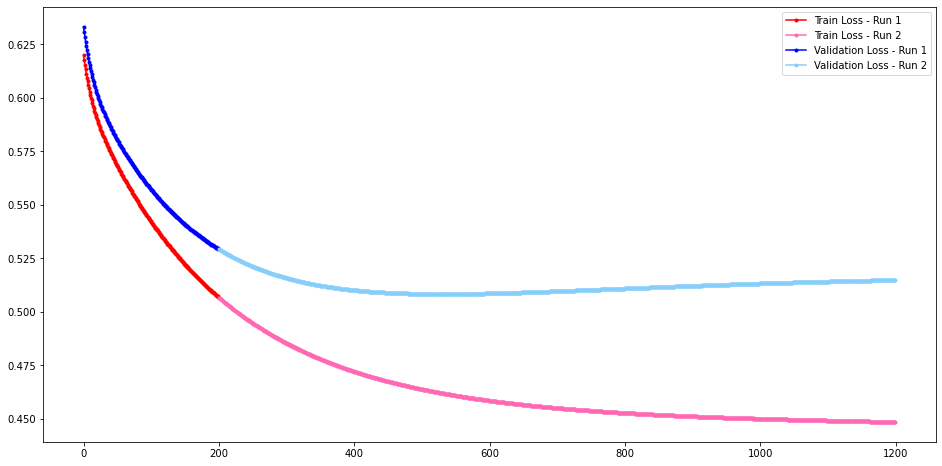

In [56]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

# #Building a 3 layer neural network 

Build a model with two hidden layers, each with 6 nodes
Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
Use a learning rate of .003 and train for 1500 epochs
Graph the trajectory of the loss functions, accuracy on both train and test set
Plot the roc curve for the predictions
Experiment with different learning rates, numbers of epochs, and network structures

In [57]:
### BEGIN SOLUTION
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 2s 3ms/sample - loss: 0.6956 - accuracy: 0.6545 - val_loss: 0.7217 - val_accuracy: 0.6406
Epoch 2/1500
576/576 [==============================] - 0s 327us/sample - loss: 0.6938 - accuracy: 0.6545 - val_loss: 0.7196 - val_accuracy: 0.6406
Epoch 3/1500
576/576 [==============================] - 0s 283us/sample - loss: 0.6919 - accuracy: 0.6545 - val_loss: 0.7175 - val_accuracy: 0.6406
Epoch 4/1500
576/576 [==============================] - 0s 304us/sample - loss: 0.6902 - accuracy: 0.6545 - val_loss: 0.7155 - val_accuracy: 0.6406
Epoch 5/1500
576/576 [==============================] - 0s 283us/sample - loss: 0.6884 - accuracy: 0.6545 - val_loss: 0.7135 - val_accuracy: 0.6406
Epoch 6/1500
576/576 [==============================] - 0s 293us/sample - loss: 0.6868 - accuracy: 0.6545 - val_loss: 0.7116 - val_accuracy: 0.6406
Epoch 7/1500
576/576 [==============================] - 0s 263us/sam

Epoch 56/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.6212 - accuracy: 0.6545 - val_loss: 0.6448 - val_accuracy: 0.6406
Epoch 57/1500
576/576 [==============================] - 0s 196us/sample - loss: 0.6200 - accuracy: 0.6545 - val_loss: 0.6438 - val_accuracy: 0.6406
Epoch 58/1500
576/576 [==============================] - 0s 275us/sample - loss: 0.6188 - accuracy: 0.6545 - val_loss: 0.6427 - val_accuracy: 0.6406
Epoch 59/1500
576/576 [==============================] - 0s 238us/sample - loss: 0.6175 - accuracy: 0.6545 - val_loss: 0.6417 - val_accuracy: 0.6406
Epoch 60/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.6163 - accuracy: 0.6545 - val_loss: 0.6406 - val_accuracy: 0.6406
Epoch 61/1500
576/576 [==============================] - 0s 190us/sample - loss: 0.6151 - accuracy: 0.6545 - val_loss: 0.6396 - val_accuracy: 0.6406
Epoch 62/1500
576/576 [==============================] - 0s 241us/sample - loss: 0.6139 - accuracy: 0.6545

Epoch 111/1500
576/576 [==============================] - 0s 203us/sample - loss: 0.5595 - accuracy: 0.7135 - val_loss: 0.5939 - val_accuracy: 0.6927
Epoch 112/1500
576/576 [==============================] - 0s 188us/sample - loss: 0.5585 - accuracy: 0.7118 - val_loss: 0.5931 - val_accuracy: 0.6979
Epoch 113/1500
576/576 [==============================] - 0s 201us/sample - loss: 0.5574 - accuracy: 0.7135 - val_loss: 0.5923 - val_accuracy: 0.6979
Epoch 114/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.5564 - accuracy: 0.7170 - val_loss: 0.5916 - val_accuracy: 0.6979
Epoch 115/1500
576/576 [==============================] - 0s 172us/sample - loss: 0.5553 - accuracy: 0.7188 - val_loss: 0.5908 - val_accuracy: 0.6927
Epoch 116/1500
576/576 [==============================] - 0s 181us/sample - loss: 0.5543 - accuracy: 0.7188 - val_loss: 0.5900 - val_accuracy: 0.6927
Epoch 117/1500
576/576 [==============================] - 0s 174us/sample - loss: 0.5533 - accuracy:

576/576 [==============================] - 0s 177us/sample - loss: 0.5127 - accuracy: 0.7483 - val_loss: 0.5629 - val_accuracy: 0.7344
Epoch 166/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.5121 - accuracy: 0.7465 - val_loss: 0.5625 - val_accuracy: 0.7344
Epoch 167/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.5115 - accuracy: 0.7483 - val_loss: 0.5622 - val_accuracy: 0.7344
Epoch 168/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.5109 - accuracy: 0.7483 - val_loss: 0.5619 - val_accuracy: 0.7344
Epoch 169/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.5103 - accuracy: 0.7500 - val_loss: 0.5615 - val_accuracy: 0.7344
Epoch 170/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.5097 - accuracy: 0.7500 - val_loss: 0.5612 - val_accuracy: 0.7344
Epoch 171/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.5091 - accuracy: 0.7535 - val_l

Epoch 220/1500
576/576 [==============================] - 0s 172us/sample - loss: 0.4866 - accuracy: 0.7778 - val_loss: 0.5504 - val_accuracy: 0.7240
Epoch 221/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4862 - accuracy: 0.7812 - val_loss: 0.5502 - val_accuracy: 0.7240
Epoch 222/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4859 - accuracy: 0.7830 - val_loss: 0.5501 - val_accuracy: 0.7240
Epoch 223/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4855 - accuracy: 0.7812 - val_loss: 0.5499 - val_accuracy: 0.7240
Epoch 224/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4852 - accuracy: 0.7795 - val_loss: 0.5498 - val_accuracy: 0.7240
Epoch 225/1500
576/576 [==============================] - 0s 175us/sample - loss: 0.4849 - accuracy: 0.7812 - val_loss: 0.5497 - val_accuracy: 0.7240
Epoch 226/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4845 - accuracy:

576/576 [==============================] - 0s 248us/sample - loss: 0.4720 - accuracy: 0.7778 - val_loss: 0.5439 - val_accuracy: 0.7396
Epoch 275/1500
576/576 [==============================] - 0s 458us/sample - loss: 0.4717 - accuracy: 0.7778 - val_loss: 0.5438 - val_accuracy: 0.7396
Epoch 276/1500
576/576 [==============================] - 0s 322us/sample - loss: 0.4715 - accuracy: 0.7778 - val_loss: 0.5437 - val_accuracy: 0.7396
Epoch 277/1500
576/576 [==============================] - 0s 230us/sample - loss: 0.4713 - accuracy: 0.7778 - val_loss: 0.5436 - val_accuracy: 0.7396
Epoch 278/1500
576/576 [==============================] - 0s 221us/sample - loss: 0.4711 - accuracy: 0.7795 - val_loss: 0.5435 - val_accuracy: 0.7396
Epoch 279/1500
576/576 [==============================] - 0s 214us/sample - loss: 0.4709 - accuracy: 0.7795 - val_loss: 0.5434 - val_accuracy: 0.7396
Epoch 280/1500
576/576 [==============================] - 0s 260us/sample - loss: 0.4707 - accuracy: 0.7778 - val_l

Epoch 329/1500
576/576 [==============================] - 0s 284us/sample - loss: 0.4619 - accuracy: 0.7812 - val_loss: 0.5391 - val_accuracy: 0.7448
Epoch 330/1500
576/576 [==============================] - 0s 221us/sample - loss: 0.4617 - accuracy: 0.7812 - val_loss: 0.5390 - val_accuracy: 0.7448
Epoch 331/1500
576/576 [==============================] - 0s 197us/sample - loss: 0.4616 - accuracy: 0.7830 - val_loss: 0.5390 - val_accuracy: 0.7448
Epoch 332/1500
576/576 [==============================] - 0s 195us/sample - loss: 0.4614 - accuracy: 0.7795 - val_loss: 0.5389 - val_accuracy: 0.7448
Epoch 333/1500
576/576 [==============================] - 0s 196us/sample - loss: 0.4613 - accuracy: 0.7812 - val_loss: 0.5388 - val_accuracy: 0.7448
Epoch 334/1500
576/576 [==============================] - 0s 240us/sample - loss: 0.4611 - accuracy: 0.7830 - val_loss: 0.5387 - val_accuracy: 0.7448
Epoch 335/1500
576/576 [==============================] - 0s 232us/sample - loss: 0.4610 - accuracy:

576/576 [==============================] - 0s 257us/sample - loss: 0.4554 - accuracy: 0.7865 - val_loss: 0.5361 - val_accuracy: 0.7500
Epoch 384/1500
576/576 [==============================] - 0s 238us/sample - loss: 0.4552 - accuracy: 0.7865 - val_loss: 0.5360 - val_accuracy: 0.7500
Epoch 385/1500
576/576 [==============================] - 0s 203us/sample - loss: 0.4552 - accuracy: 0.7865 - val_loss: 0.5360 - val_accuracy: 0.7500
Epoch 386/1500
576/576 [==============================] - 0s 236us/sample - loss: 0.4550 - accuracy: 0.7865 - val_loss: 0.5359 - val_accuracy: 0.7500
Epoch 387/1500
576/576 [==============================] - 0s 206us/sample - loss: 0.4549 - accuracy: 0.7865 - val_loss: 0.5359 - val_accuracy: 0.7500
Epoch 388/1500
576/576 [==============================] - 0s 191us/sample - loss: 0.4548 - accuracy: 0.7865 - val_loss: 0.5359 - val_accuracy: 0.7500
Epoch 389/1500
576/576 [==============================] - 0s 195us/sample - loss: 0.4547 - accuracy: 0.7865 - val_l

Epoch 438/1500
576/576 [==============================] - 0s 213us/sample - loss: 0.4509 - accuracy: 0.7882 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 439/1500
576/576 [==============================] - 0s 217us/sample - loss: 0.4508 - accuracy: 0.7882 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 440/1500
576/576 [==============================] - 0s 199us/sample - loss: 0.4507 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 441/1500
576/576 [==============================] - 0s 333us/sample - loss: 0.4507 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 442/1500
576/576 [==============================] - 0s 257us/sample - loss: 0.4506 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 443/1500
576/576 [==============================] - 0s 198us/sample - loss: 0.4506 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 444/1500
576/576 [==============================] - 0s 201us/sample - loss: 0.4505 - accuracy:

576/576 [==============================] - 0s 172us/sample - loss: 0.4475 - accuracy: 0.7882 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 493/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4474 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 494/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4474 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 495/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4473 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 496/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4473 - accuracy: 0.7899 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 497/1500
576/576 [==============================] - 0s 243us/sample - loss: 0.4472 - accuracy: 0.7917 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 498/1500
576/576 [==============================] - 0s 243us/sample - loss: 0.4472 - accuracy: 0.7899 - val_l

Epoch 547/1500
576/576 [==============================] - 0s 191us/sample - loss: 0.4442 - accuracy: 0.7934 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 548/1500
576/576 [==============================] - 0s 204us/sample - loss: 0.4441 - accuracy: 0.7934 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 549/1500
576/576 [==============================] - 0s 205us/sample - loss: 0.4441 - accuracy: 0.7951 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 550/1500
576/576 [==============================] - 0s 190us/sample - loss: 0.4440 - accuracy: 0.7951 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 551/1500
576/576 [==============================] - 0s 204us/sample - loss: 0.4439 - accuracy: 0.7969 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 552/1500
576/576 [==============================] - 0s 167us/sample - loss: 0.4438 - accuracy: 0.7951 - val_loss: 0.5349 - val_accuracy: 0.7344
Epoch 553/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4438 - accuracy:

576/576 [==============================] - 0s 179us/sample - loss: 0.4409 - accuracy: 0.7986 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 602/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4409 - accuracy: 0.8003 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 603/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4408 - accuracy: 0.8003 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 604/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4407 - accuracy: 0.8003 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 605/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4407 - accuracy: 0.8003 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 606/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4407 - accuracy: 0.7986 - val_loss: 0.5348 - val_accuracy: 0.7396
Epoch 607/1500
576/576 [==============================] - 0s 171us/sample - loss: 0.4406 - accuracy: 0.7986 - val_l

Epoch 656/1500
576/576 [==============================] - 0s 191us/sample - loss: 0.4375 - accuracy: 0.8021 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 657/1500
576/576 [==============================] - 0s 187us/sample - loss: 0.4374 - accuracy: 0.8038 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 658/1500
576/576 [==============================] - 0s 185us/sample - loss: 0.4374 - accuracy: 0.8021 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 659/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4373 - accuracy: 0.8021 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 660/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4373 - accuracy: 0.8021 - val_loss: 0.5354 - val_accuracy: 0.7344
Epoch 661/1500
576/576 [==============================] - 0s 200us/sample - loss: 0.4372 - accuracy: 0.8038 - val_loss: 0.5355 - val_accuracy: 0.7344
Epoch 662/1500
576/576 [==============================] - 0s 360us/sample - loss: 0.4372 - accuracy:

576/576 [==============================] - 0s 233us/sample - loss: 0.4344 - accuracy: 0.8073 - val_loss: 0.5365 - val_accuracy: 0.7448
Epoch 711/1500
576/576 [==============================] - 0s 241us/sample - loss: 0.4343 - accuracy: 0.8056 - val_loss: 0.5366 - val_accuracy: 0.7448
Epoch 712/1500
576/576 [==============================] - 0s 234us/sample - loss: 0.4343 - accuracy: 0.8056 - val_loss: 0.5366 - val_accuracy: 0.7448
Epoch 713/1500
576/576 [==============================] - 0s 217us/sample - loss: 0.4342 - accuracy: 0.8073 - val_loss: 0.5366 - val_accuracy: 0.7448
Epoch 714/1500
576/576 [==============================] - 0s 212us/sample - loss: 0.4342 - accuracy: 0.8056 - val_loss: 0.5367 - val_accuracy: 0.7448
Epoch 715/1500
576/576 [==============================] - 0s 249us/sample - loss: 0.4342 - accuracy: 0.8073 - val_loss: 0.5367 - val_accuracy: 0.7448
Epoch 716/1500
576/576 [==============================] - 0s 228us/sample - loss: 0.4341 - accuracy: 0.8056 - val_l

Epoch 765/1500
576/576 [==============================] - 0s 200us/sample - loss: 0.4315 - accuracy: 0.8108 - val_loss: 0.5381 - val_accuracy: 0.7448
Epoch 766/1500
576/576 [==============================] - 0s 185us/sample - loss: 0.4315 - accuracy: 0.8108 - val_loss: 0.5381 - val_accuracy: 0.7448
Epoch 767/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.4314 - accuracy: 0.8108 - val_loss: 0.5382 - val_accuracy: 0.7448
Epoch 768/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.4313 - accuracy: 0.8108 - val_loss: 0.5382 - val_accuracy: 0.7448
Epoch 769/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4313 - accuracy: 0.8108 - val_loss: 0.5382 - val_accuracy: 0.7448
Epoch 770/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4313 - accuracy: 0.8108 - val_loss: 0.5382 - val_accuracy: 0.7448
Epoch 771/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4312 - accuracy:

576/576 [==============================] - 0s 255us/sample - loss: 0.4287 - accuracy: 0.8142 - val_loss: 0.5396 - val_accuracy: 0.7396
Epoch 820/1500
576/576 [==============================] - 0s 216us/sample - loss: 0.4287 - accuracy: 0.8142 - val_loss: 0.5396 - val_accuracy: 0.7396
Epoch 821/1500
576/576 [==============================] - 0s 188us/sample - loss: 0.4286 - accuracy: 0.8142 - val_loss: 0.5397 - val_accuracy: 0.7396
Epoch 822/1500
576/576 [==============================] - 0s 194us/sample - loss: 0.4286 - accuracy: 0.8142 - val_loss: 0.5397 - val_accuracy: 0.7396
Epoch 823/1500
576/576 [==============================] - 0s 191us/sample - loss: 0.4285 - accuracy: 0.8142 - val_loss: 0.5397 - val_accuracy: 0.7396
Epoch 824/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4285 - accuracy: 0.8142 - val_loss: 0.5398 - val_accuracy: 0.7396
Epoch 825/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4285 - accuracy: 0.8142 - val_l

Epoch 874/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4258 - accuracy: 0.8142 - val_loss: 0.5417 - val_accuracy: 0.7396
Epoch 875/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4258 - accuracy: 0.8142 - val_loss: 0.5417 - val_accuracy: 0.7396
Epoch 876/1500
576/576 [==============================] - 0s 190us/sample - loss: 0.4257 - accuracy: 0.8142 - val_loss: 0.5417 - val_accuracy: 0.7396
Epoch 877/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4256 - accuracy: 0.8142 - val_loss: 0.5418 - val_accuracy: 0.7396
Epoch 878/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4256 - accuracy: 0.8142 - val_loss: 0.5418 - val_accuracy: 0.7396
Epoch 879/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4255 - accuracy: 0.8142 - val_loss: 0.5418 - val_accuracy: 0.7396
Epoch 880/1500
576/576 [==============================] - 0s 175us/sample - loss: 0.4254 - accuracy:

576/576 [==============================] - 0s 177us/sample - loss: 0.4228 - accuracy: 0.8108 - val_loss: 0.5440 - val_accuracy: 0.7448
Epoch 929/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4227 - accuracy: 0.8125 - val_loss: 0.5440 - val_accuracy: 0.7448
Epoch 930/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4227 - accuracy: 0.8108 - val_loss: 0.5441 - val_accuracy: 0.7448
Epoch 931/1500
576/576 [==============================] - 0s 180us/sample - loss: 0.4226 - accuracy: 0.8108 - val_loss: 0.5441 - val_accuracy: 0.7448
Epoch 932/1500
576/576 [==============================] - 0s 188us/sample - loss: 0.4226 - accuracy: 0.8108 - val_loss: 0.5441 - val_accuracy: 0.7448
Epoch 933/1500
576/576 [==============================] - 0s 185us/sample - loss: 0.4226 - accuracy: 0.8108 - val_loss: 0.5442 - val_accuracy: 0.7448
Epoch 934/1500
576/576 [==============================] - 0s 186us/sample - loss: 0.4225 - accuracy: 0.8108 - val_l

Epoch 983/1500
576/576 [==============================] - 0s 249us/sample - loss: 0.4205 - accuracy: 0.8142 - val_loss: 0.5464 - val_accuracy: 0.7396
Epoch 984/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4204 - accuracy: 0.8125 - val_loss: 0.5464 - val_accuracy: 0.7396
Epoch 985/1500
576/576 [==============================] - 0s 208us/sample - loss: 0.4204 - accuracy: 0.8142 - val_loss: 0.5464 - val_accuracy: 0.7396
Epoch 986/1500
576/576 [==============================] - 0s 223us/sample - loss: 0.4203 - accuracy: 0.8142 - val_loss: 0.5465 - val_accuracy: 0.7396
Epoch 987/1500
576/576 [==============================] - 0s 198us/sample - loss: 0.4203 - accuracy: 0.8142 - val_loss: 0.5465 - val_accuracy: 0.7396
Epoch 988/1500
576/576 [==============================] - 0s 282us/sample - loss: 0.4203 - accuracy: 0.8125 - val_loss: 0.5466 - val_accuracy: 0.7396
Epoch 989/1500
576/576 [==============================] - 0s 259us/sample - loss: 0.4202 - accuracy:

576/576 [==============================] - 0s 180us/sample - loss: 0.4186 - accuracy: 0.8142 - val_loss: 0.5480 - val_accuracy: 0.7396
Epoch 1038/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4185 - accuracy: 0.8142 - val_loss: 0.5480 - val_accuracy: 0.7396
Epoch 1039/1500
576/576 [==============================] - 0s 174us/sample - loss: 0.4186 - accuracy: 0.8142 - val_loss: 0.5481 - val_accuracy: 0.7396
Epoch 1040/1500
576/576 [==============================] - 0s 182us/sample - loss: 0.4185 - accuracy: 0.8142 - val_loss: 0.5481 - val_accuracy: 0.7396
Epoch 1041/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4185 - accuracy: 0.8142 - val_loss: 0.5481 - val_accuracy: 0.7396
Epoch 1042/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4184 - accuracy: 0.8142 - val_loss: 0.5481 - val_accuracy: 0.7396
Epoch 1043/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4184 - accuracy: 0.8142 -

576/576 [==============================] - 0s 178us/sample - loss: 0.4167 - accuracy: 0.8125 - val_loss: 0.5499 - val_accuracy: 0.7344
Epoch 1092/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4167 - accuracy: 0.8125 - val_loss: 0.5499 - val_accuracy: 0.7344
Epoch 1093/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4167 - accuracy: 0.8125 - val_loss: 0.5499 - val_accuracy: 0.7344
Epoch 1094/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4166 - accuracy: 0.8125 - val_loss: 0.5499 - val_accuracy: 0.7344
Epoch 1095/1500
576/576 [==============================] - 0s 175us/sample - loss: 0.4166 - accuracy: 0.8125 - val_loss: 0.5500 - val_accuracy: 0.7344
Epoch 1096/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4166 - accuracy: 0.8125 - val_loss: 0.5500 - val_accuracy: 0.7344
Epoch 1097/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4166 - accuracy: 0.8125 -

576/576 [==============================] - 0s 177us/sample - loss: 0.4149 - accuracy: 0.8125 - val_loss: 0.5513 - val_accuracy: 0.7396
Epoch 1146/1500
576/576 [==============================] - 0s 177us/sample - loss: 0.4148 - accuracy: 0.8125 - val_loss: 0.5513 - val_accuracy: 0.7396
Epoch 1147/1500
576/576 [==============================] - 0s 179us/sample - loss: 0.4148 - accuracy: 0.8125 - val_loss: 0.5513 - val_accuracy: 0.7396
Epoch 1148/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4147 - accuracy: 0.8125 - val_loss: 0.5513 - val_accuracy: 0.7396
Epoch 1149/1500
576/576 [==============================] - 0s 164us/sample - loss: 0.4147 - accuracy: 0.8125 - val_loss: 0.5514 - val_accuracy: 0.7396
Epoch 1150/1500
576/576 [==============================] - 0s 166us/sample - loss: 0.4147 - accuracy: 0.8125 - val_loss: 0.5514 - val_accuracy: 0.7396
Epoch 1151/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4146 - accuracy: 0.8125 -

576/576 [==============================] - 0s 176us/sample - loss: 0.4133 - accuracy: 0.8125 - val_loss: 0.5529 - val_accuracy: 0.7396
Epoch 1200/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.4133 - accuracy: 0.8125 - val_loss: 0.5529 - val_accuracy: 0.7396
Epoch 1201/1500
576/576 [==============================] - 0s 188us/sample - loss: 0.4132 - accuracy: 0.8125 - val_loss: 0.5529 - val_accuracy: 0.7396
Epoch 1202/1500
576/576 [==============================] - 0s 176us/sample - loss: 0.4132 - accuracy: 0.8125 - val_loss: 0.5529 - val_accuracy: 0.7396
Epoch 1203/1500
576/576 [==============================] - 0s 178us/sample - loss: 0.4131 - accuracy: 0.8125 - val_loss: 0.5530 - val_accuracy: 0.7396
Epoch 1204/1500
576/576 [==============================] - 0s 174us/sample - loss: 0.4131 - accuracy: 0.8125 - val_loss: 0.5530 - val_accuracy: 0.7396
Epoch 1205/1500
576/576 [==============================] - 0s 167us/sample - loss: 0.4131 - accuracy: 0.8125 -

576/576 [==============================] - 0s 173us/sample - loss: 0.4119 - accuracy: 0.8108 - val_loss: 0.5541 - val_accuracy: 0.7344
Epoch 1254/1500
576/576 [==============================] - 0s 197us/sample - loss: 0.4119 - accuracy: 0.8108 - val_loss: 0.5542 - val_accuracy: 0.7344
Epoch 1255/1500
576/576 [==============================] - 0s 197us/sample - loss: 0.4118 - accuracy: 0.8108 - val_loss: 0.5542 - val_accuracy: 0.7344
Epoch 1256/1500
576/576 [==============================] - 0s 191us/sample - loss: 0.4118 - accuracy: 0.8108 - val_loss: 0.5542 - val_accuracy: 0.7344
Epoch 1257/1500
576/576 [==============================] - 0s 208us/sample - loss: 0.4117 - accuracy: 0.8108 - val_loss: 0.5543 - val_accuracy: 0.7344
Epoch 1258/1500
576/576 [==============================] - 0s 190us/sample - loss: 0.4118 - accuracy: 0.8090 - val_loss: 0.5543 - val_accuracy: 0.7344
Epoch 1259/1500
576/576 [==============================] - 0s 185us/sample - loss: 0.4118 - accuracy: 0.8108 -

576/576 [==============================] - 0s 224us/sample - loss: 0.4104 - accuracy: 0.8090 - val_loss: 0.5555 - val_accuracy: 0.7292
Epoch 1308/1500
576/576 [==============================] - 0s 211us/sample - loss: 0.4104 - accuracy: 0.8090 - val_loss: 0.5555 - val_accuracy: 0.7292
Epoch 1309/1500
576/576 [==============================] - 0s 235us/sample - loss: 0.4104 - accuracy: 0.8090 - val_loss: 0.5555 - val_accuracy: 0.7292
Epoch 1310/1500
576/576 [==============================] - 0s 238us/sample - loss: 0.4103 - accuracy: 0.8090 - val_loss: 0.5555 - val_accuracy: 0.7292
Epoch 1311/1500
576/576 [==============================] - 0s 225us/sample - loss: 0.4103 - accuracy: 0.8090 - val_loss: 0.5556 - val_accuracy: 0.7292
Epoch 1312/1500
576/576 [==============================] - 0s 187us/sample - loss: 0.4103 - accuracy: 0.8090 - val_loss: 0.5556 - val_accuracy: 0.7292
Epoch 1313/1500
576/576 [==============================] - 0s 192us/sample - loss: 0.4103 - accuracy: 0.8090 -

576/576 [==============================] - 0s 178us/sample - loss: 0.4091 - accuracy: 0.8125 - val_loss: 0.5568 - val_accuracy: 0.7240
Epoch 1362/1500
576/576 [==============================] - 0s 194us/sample - loss: 0.4091 - accuracy: 0.8125 - val_loss: 0.5569 - val_accuracy: 0.7240
Epoch 1363/1500
576/576 [==============================] - 0s 217us/sample - loss: 0.4091 - accuracy: 0.8125 - val_loss: 0.5569 - val_accuracy: 0.7240
Epoch 1364/1500
576/576 [==============================] - 0s 267us/sample - loss: 0.4092 - accuracy: 0.8125 - val_loss: 0.5569 - val_accuracy: 0.7240
Epoch 1365/1500
576/576 [==============================] - 0s 279us/sample - loss: 0.4091 - accuracy: 0.8125 - val_loss: 0.5569 - val_accuracy: 0.7240
Epoch 1366/1500
576/576 [==============================] - 0s 262us/sample - loss: 0.4090 - accuracy: 0.8125 - val_loss: 0.5570 - val_accuracy: 0.7240
Epoch 1367/1500
576/576 [==============================] - 0s 203us/sample - loss: 0.4090 - accuracy: 0.8125 -

576/576 [==============================] - 0s 195us/sample - loss: 0.4080 - accuracy: 0.8108 - val_loss: 0.5580 - val_accuracy: 0.7292
Epoch 1416/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.4080 - accuracy: 0.8125 - val_loss: 0.5581 - val_accuracy: 0.7292
Epoch 1417/1500
576/576 [==============================] - 0s 184us/sample - loss: 0.4080 - accuracy: 0.8108 - val_loss: 0.5581 - val_accuracy: 0.7292
Epoch 1418/1500
576/576 [==============================] - 0s 201us/sample - loss: 0.4080 - accuracy: 0.8108 - val_loss: 0.5581 - val_accuracy: 0.7292
Epoch 1419/1500
576/576 [==============================] - 0s 217us/sample - loss: 0.4079 - accuracy: 0.8108 - val_loss: 0.5582 - val_accuracy: 0.7292
Epoch 1420/1500
576/576 [==============================] - 0s 222us/sample - loss: 0.4079 - accuracy: 0.8108 - val_loss: 0.5582 - val_accuracy: 0.7292
Epoch 1421/1500
576/576 [==============================] - 0s 186us/sample - loss: 0.4079 - accuracy: 0.8090 -

576/576 [==============================] - 0s 191us/sample - loss: 0.4068 - accuracy: 0.8090 - val_loss: 0.5596 - val_accuracy: 0.7240
Epoch 1470/1500
576/576 [==============================] - 0s 207us/sample - loss: 0.4069 - accuracy: 0.8073 - val_loss: 0.5596 - val_accuracy: 0.7240
Epoch 1471/1500
576/576 [==============================] - 0s 202us/sample - loss: 0.4068 - accuracy: 0.8090 - val_loss: 0.5597 - val_accuracy: 0.7240
Epoch 1472/1500
576/576 [==============================] - 0s 218us/sample - loss: 0.4068 - accuracy: 0.8090 - val_loss: 0.5597 - val_accuracy: 0.7240
Epoch 1473/1500
576/576 [==============================] - 0s 201us/sample - loss: 0.4068 - accuracy: 0.8090 - val_loss: 0.5597 - val_accuracy: 0.7240
Epoch 1474/1500
576/576 [==============================] - 0s 268us/sample - loss: 0.4068 - accuracy: 0.8090 - val_loss: 0.5597 - val_accuracy: 0.7240
Epoch 1475/1500
576/576 [==============================] - 0s 226us/sample - loss: 0.4068 - accuracy: 0.8090 -

Text(0.5, 1.0, 'Accuracy over iterations')

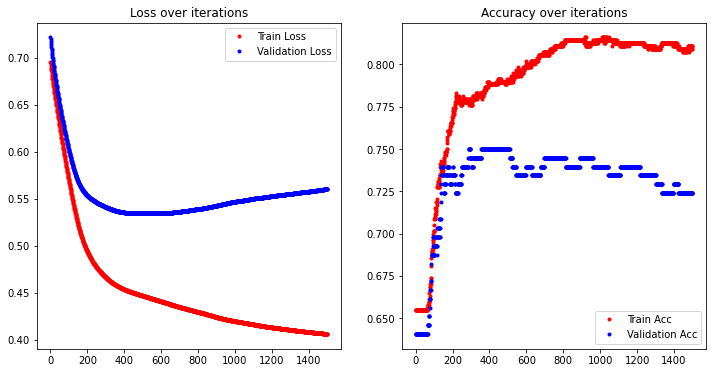

In [58]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.724
roc-auc is 0.794


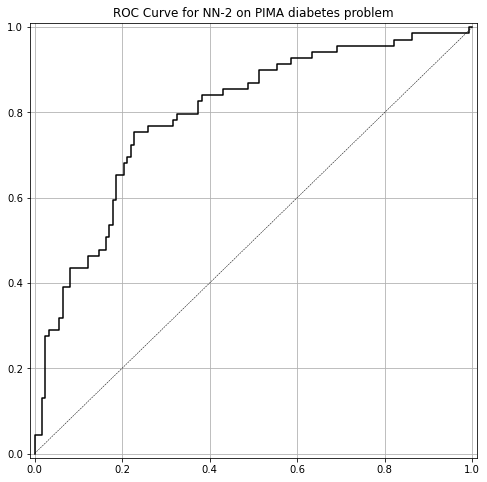

In [59]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')

# Summary

In this session we discovered how to create first neural network model using the powerful Keras Python library for deep learning. Specifically you learned the five key steps in using Keras to create a neural network or deep learning model.

Steps:

  1. How to load data.
  2. How to define a neural network model in Keras.  
  3. How to compile a Keras model using the efficient numerical backend.                                       
  4. How to train a model on data.
  5. How to evaluate a model on data.